<a href="https://colab.research.google.com/github/aliakbarmdzh/Fashion_MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
from torchvision import models
from  torchvision import transforms

loading data

In [ ]:
training_data=datasets.FashionMNIST(root='/content/drive/MyDrive/Colab Notebooks',train=True,download=True,transform=ToTensor())
test_data=datasets.FashionMNIST(root='/content/drive/MyDrive/Colab Notebooks',train=False,download=True,transform=ToTensor())

Examining data

In [ ]:
image_size=28
def plot_show(sample_data):
    plt.imshow(sample_data[0].numpy().reshape(image_size,image_size),cmap='gray')
plot_show(training_data[0])

In [1]:
input_size=image_size*image_size
output_size=torch.unique(training_data.targets).shape[0]

NameError: ignored

Defininf Neural Network Moldes

In [ ]:
class softmax(nn.Module):
    #constructor
    def __init__(self,input_size,output_size):
        super().__init__()
        self.linear=nn.Linear(input_size,output_size)
    #prediction
    def forward(self,x):
        z=self.linear(x)
        return z

In [ ]:
class Net(nn.Module):
    #constructor
    def __init__(self,input_size,middle_size,output_size):
        super().__init__()
        self.linear1=nn.Linear(input_size,middle_size)
        self.linear2=nn.Linear(middle_size,output_size)
    #prediction
    def forward(self,x):
      x=self.linear1(x)
      x=self.linear2(x)
      return x
    

In [ ]:
class Net_relu(nn.Module):
    #constructor
    def __init__(self,input_size,middle_size,output_size):
        super().__init__()
        self.linear1=nn.Linear(input_size,middle_size)
        self.linear2=nn.Linear(middle_size,output_size)
    #prediction
    def forward(self,x):
      x=torch.relu(self.linear1(x))
      x=self.linear2(x)
      return x

In [ ]:
class Net_relu_norm(nn.Module):
    #constructor
    def __init__(self,input_size,middle_size,output_size):
        super().__init__()
        self.linear1=nn.Linear(input_size,middle_size)
        self.linear2=nn.Linear(middle_size,output_size)
        self.bn1=nn.BatchNorm1d(middle_size)
    #prediction
    def forward(self,x):
      x=self.bn1(torch.relu(self.linear1(x)))
      x=self.linear2(x)
      return x

In [ ]:
class Net_relu_norm_2hidden(nn.Module):
    #constructor
    def __init__(self,input_size,middle_size1,middle_size2,output_size):
        super().__init__()
        self.linear1=nn.Linear(input_size,middle_size1)
        self.linear2=nn.Linear(middle_size1,middle_size2)
        self.linear3=nn.Linear(middle_size2,output_size)
        self.bn1=nn.BatchNorm1d(middle_size1)
        self.bn2=nn.BatchNorm1d(middle_size2)
    #prediction
    def forward(self,x):
      x=self.bn1(torch.relu(self.linear1(x)))
      x=self.bn2(torch.relu(self.linear2(x)))
      x=self.linear3(x)
      return x

In [ ]:
class CNN2(nn.Module):
    
    # Contructor
    def __init__(self,input_channel,out_1,out_2,out_3,output_size):
        super().__init__()
        self.cnn1 = nn.Conv2d(in_channels=input_channel, out_channels=out_1, kernel_size=3,padding=1)
        self.bn1=nn.BatchNorm2d(out_1)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=3,padding=1)
        self.bn2=nn.BatchNorm2d(out_2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)


        self.average=nn.AdaptiveAvgPool2d((1,1))
        self.linear1=nn.Linear(out_2*14*14,out_3)

        self.fc1 = nn.Linear(out_3, output_size)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        #x=self.bn1(x)
        x = torch.relu(x)

        x = self.cnn2(x)
        #x=self.bn2(x)
        x = torch.relu(x)         
        x = self.maxpool2(x)
        x=torch.nn.Dropout(p=0.25)
        

        #x=self.average(x)
        #x = x.view(x.size(0), -1)
        x=torch.flatten(x,1)
        x=self.linear1(x)
        x=torch.relu(x)
        x=torch.nn.Dropout(p=0.5)

        x = self.fc1(x)
        return x

training function for neural without convolution

In [ ]:
def train_model(epochs):
  for epoch in range(epochs):
    for x,y in train_load:
        optimizer.zero_grad()
        z=model(x.view(-1,input_size))
        loss=criterion(z,y)
        loss.backward()
        optimizer.step()
        
    correct=0
    #prediction
    for x,y in test_load:
        z=model(x.view(-1,input_size))
        _,y_hat=torch.max(z,1)
        correct+=(y_hat==y).sum().item()
    accuracy=correct/len(test_data)
    accuracy_list.append(accuracy)
    loss_list.append(loss.data)

Training function for convoluted models

In [ ]:
def train_model_cnn(epochs):
  for epoch in range(epochs):
    for x,y in train_load:
        optimizer.zero_grad()
        z=model(x)
        loss=criterion(z,y)
        loss.backward()
        optimizer.step()
        
    correct=0
    #prediction
    for x,y in test_load:
        z=model(x)
        _,y_hat=torch.max(z,1)
        correct+=(y_hat==y).sum().item()
    accuracy=correct/len(test_data)
    accuracy_list.append(accuracy)
    loss_list.append(loss.data)

In [ ]:
def accuracy_loss_plot(accuracy_list,loss_list):
  fig,ax=plt.subplots()
  ax.plot(accuracy_list,color='blue')
  ax.set_ylabel('accuracy')
  ax.set_xlabel('epochs')

  ax2=ax.twinx()
  ax2.plot(loss_list,color='red')
  ax2.set_ylabel('loss')

In [ ]:
Model without hidden layer

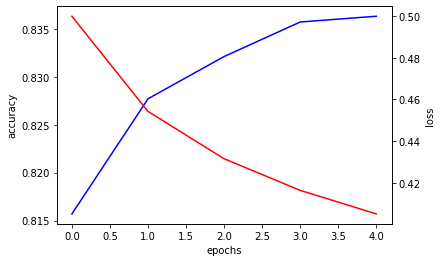

In [ ]:
#softmax model
model=softmax(input_size,output_size)

learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
criterion=nn.CrossEntropyLoss()
len_test=len(test_data)

train_load=torch.utils.data.DataLoader(dataset=training_data,batch_size=100)
test_load=torch.utils.data.DataLoader(dataset=test_data,batch_size=len_test)

epochs=5
loss_list=[]
accuracy_list=[]

train_model(epochs)
accuracy_loss_plot(accuracy_list,loss_list)

Model with 1 hidden layer

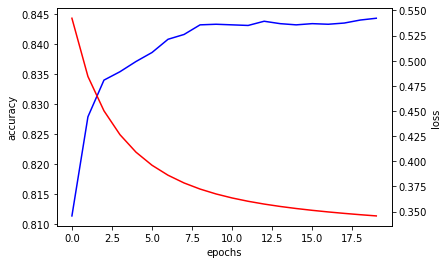

In [ ]:
#hidden layer model
model=Net(input_size,middle_size,output_size)


learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
criterion=nn.CrossEntropyLoss()
len_test=len(test_data)

train_load=torch.utils.data.DataLoader(dataset=training_data,batch_size=100)
test_load=torch.utils.data.DataLoader(dataset=test_data,batch_size=len_test)


epochs=20
loss_list=[]
accuracy_list=[]
input_size=image_size*image_size
output_size=torch.unique(training_data.targets).shape[0]
middle_size=50
train_model(epochs)
accuracy_loss_plot(accuracy_list,loss_list)

Using relu function for activation

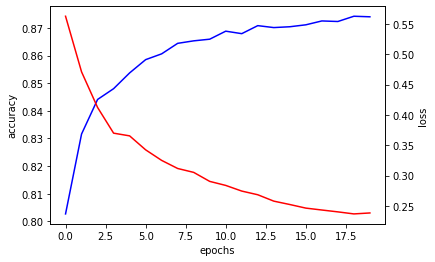

In [ ]:
#hidden layer with relu model
model=Net_relu(input_size,middle_size,output_size)


learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
criterion=nn.CrossEntropyLoss()
len_test=len(test_data)

train_load=torch.utils.data.DataLoader(dataset=training_data,batch_size=100)
test_load=torch.utils.data.DataLoader(dataset=test_data,batch_size=len_test)


epochs=20
loss_list=[]
accuracy_list=[]
input_size=image_size*image_size
output_size=torch.unique(training_data.targets).shape[0]
middle_size=50
train_model(epochs)
accuracy_loss_plot(accuracy_list,loss_list)

Testing momentum

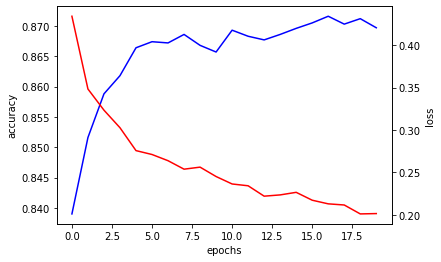

In [ ]:
#hidden layer with relu and momentum model
model=Net_relu(input_size,middle_size,output_size)


learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.5)
criterion=nn.CrossEntropyLoss()
len_test=len(test_data)

#indices=torch.randperm(len(training_data))[:3000]
#sampler=torch.utils.data.SubsetRandomSampler(indices)
train_load=torch.utils.data.DataLoader(dataset=training_data,batch_size=100)
test_load=torch.utils.data.DataLoader(dataset=test_data,batch_size=len_test)


epochs=20
loss_list=[]
accuracy_list=[]
input_size=image_size*image_size
output_size=torch.unique(training_data.targets).shape[0]
middle_size=50
train_model(epochs)
accuracy_loss_plot(accuracy_list,loss_list)

using random smaller samples for training

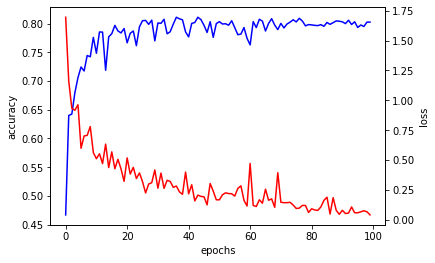

In [ ]:
#smaller sample for training with hidden layer and relu and momentum model
middle_size=50

model=Net_relu(input_size,middle_size,output_size)

learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.5)
criterion=nn.CrossEntropyLoss()
len_test=len(test_data)

indices=torch.randperm(len(training_data))[:1000]
sampler=torch.utils.data.SubsetRandomSampler(indices)
train_load=torch.utils.data.DataLoader(dataset=training_data,batch_size=100,sampler=sampler)
test_load=torch.utils.data.DataLoader(dataset=test_data,batch_size=len_test)


epochs=100
loss_list=[]
accuracy_list=[]

train_model(epochs)
accuracy_loss_plot(accuracy_list,loss_list)

using normalization

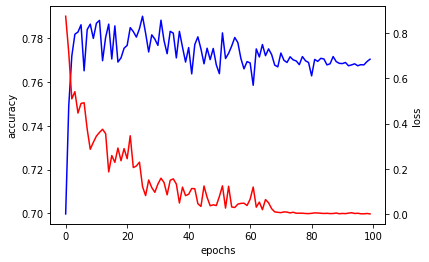

In [ ]:
#normmed with 1 hidden layer and relu and momentum model

middle_size=50

model=Net_relu_norm(input_size,middle_size,output_size)

learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.5)
criterion=nn.CrossEntropyLoss()
len_test=len(test_data)

indices=torch.randperm(len(training_data))[:1000]
sampler=torch.utils.data.SubsetRandomSampler(indices)
train_load=torch.utils.data.DataLoader(dataset=training_data,batch_size=100,sampler=sampler)
test_load=torch.utils.data.DataLoader(dataset=test_data,batch_size=len_test)


epochs=100
loss_list=[]
accuracy_list=[]

train_model(epochs)
accuracy_loss_plot(accuracy_list,loss_list)

using Adam Optimizer

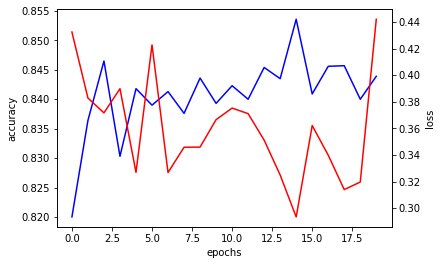

In [ ]:
#normed with 1 hidden layer and relu with adam optimizer
input_size=image_size*image_size
output_size=torch.unique(training_data.targets).shape[0]
middle_size=50

model=Net_relu_norm(input_size,middle_size,output_size)

learning_rate=0.1
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
criterion=nn.CrossEntropyLoss()
len_test=len(test_data)

#indices=torch.randperm(len(training_data))[:1000]
#sampler=torch.utils.data.SubsetRandomSampler(indices)
train_load=torch.utils.data.DataLoader(dataset=training_data,batch_size=100)
test_load=torch.utils.data.DataLoader(dataset=test_data,batch_size=len_test)


epochs=20
loss_list=[]
accuracy_list=[]

train_model(epochs)
accuracy_loss_plot(accuracy_list,loss_list)

2 Hidden Layers

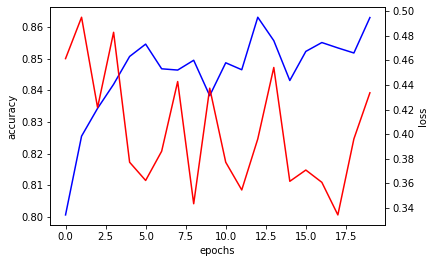

In [ ]:
#normed with 2 hidden layer and relu with adam optimizer
input_size=image_size*image_size
output_size=torch.unique(training_data.targets).shape[0]
middle_size=50

model=Net_relu_norm_2hidden(input_size,middle_size,middle_size,output_size)

learning_rate=0.1
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
criterion=nn.CrossEntropyLoss()
len_test=len(test_data)

#indices=torch.randperm(len(training_data))[:6000]
#sampler=torch.utils.data.SubsetRandomSampler(indices)
train_load=torch.utils.data.DataLoader(dataset=training_data,batch_size=100)
test_load=torch.utils.data.DataLoader(dataset=test_data,batch_size=len_test)


epochs=20
loss_list=[]
accuracy_list=[]

train_model(epochs)
accuracy_loss_plot(accuracy_list,loss_list)